In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

In [2]:
col_names = ['fixed_acidity',
             'volatile_acidity',
             'citric_acid',
             'residual_sugar',
             'chlorides',
             'free_sulfur',
             'total_sulfur',
             'density',
             'pH',
             'sulphates',
             'alcohol',
            ]

In [3]:
Xy = np.loadtxt("winequality-white.csv", delimiter=";", skiprows=1)

X = Xy[:, 0:-1]
y = Xy[:, -1]
y=np.array([y]).T

In [4]:
df_x = pd.DataFrame(X, columns=col_names)
print(df_x.head())

df_y = pd.DataFrame(y, columns=['quality'])
print(df_y.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur  total_sulfur  density    pH  sulphates  alcohol  
0         45.0         170.0   1.0010  3.00       0.45      8.8  
1         14.0         132.0   0.9940  3.30       0.49      9.5  
2         30.0          97.0   0.9951  3.26       0.44     10.1  
3         47.0         186.0   0.9956  3.19       0.40      9.9  
4         47.0         186.0   0.9956  3.19       0.40      9.9  
   quality
0      6.0
1      6.0
2      6.0
3      6.0
4      6.0


In [75]:
from myalgorithm.ridge_regression import RidgeRegression
rr = RidgeRegression(penalty=0.0, add_const=False)
rr.fit(X=df_x, y=df_y)

rr_sgd = RidgeRegression(penalty=0.0, opt='gradient_descent', lr=3e-5, n_epochs=100, add_const=False)
rr_sgd.fit(X=X, y=y)

# y just has to be the right shape!!!!

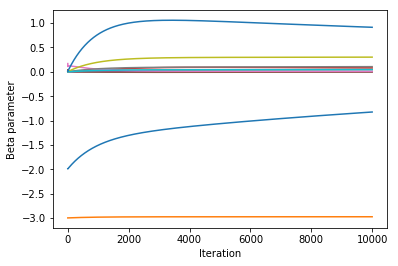

In [76]:
for i in np.arange(0, len(rr_sgd.beta)):
    plt.plot(rr_sgd.beta_history[i])

plt.xlabel('Iteration')
plt.ylabel('Beta parameter')
# plt.legend(['int','slope'])
plt.show()

In [77]:
rr_sgd.beta

array([[-0.82484696],
       [-2.97595254],
       [ 0.04804827],
       [ 0.08141153],
       [ 0.00568718],
       [-0.00629488],
       [ 0.00949423],
       [ 0.10659761],
       [ 0.30195979],
       [ 0.04666803],
       [ 0.9150292 ]])

In [78]:
rr.beta

array([[-5.05906229e-02],
       [-1.95851023e+00],
       [-2.93492412e-02],
       [ 2.49883984e-02],
       [-9.42582369e-01],
       [ 4.79078658e-03],
       [-8.77630817e-04],
       [ 2.04204607e+00],
       [ 1.68395142e-01],
       [ 4.16453560e-01],
       [ 3.65633380e-01]])

In [62]:
array([[ 1.95250696e+02],
       [ 8.51759498e-02],
       [-2.42213022e+00],
       [ 2.87172617e-02],
       [ 1.05927643e-01],
       [-3.21459498e-01],
       [ 4.85259475e-03],
       [-3.71471645e-04],
       [-1.95369435e+02],
       [ 8.92246865e-01],
       [ 8.20919415e-01],
       [ 2.51518406e-01]])

NameError: name 'array' is not defined

# Simulate basic data

In [116]:
x = np.random.normal(size=[100,1])*100
y = x+np.random.normal(size=[100,1])

In [119]:
from myalgorithm.ridge_regression import RidgeRegression
rr = RidgeRegression(penalty=0, add_const=True)
rr.fit(X=x, y=y)

In [120]:
rr.beta

array([[0.02767326],
       [0.99879481]])

In [154]:
rr_sgd = RidgeRegression(penalty=0, opt='sgd_test', lr=3e-5, n_epochs=30000, add_const=True)
rr_sgd.fit(X=x, y=y)

In [155]:
rr_sgd.beta


array([[-0.47673521],
       [ 0.99914328]])

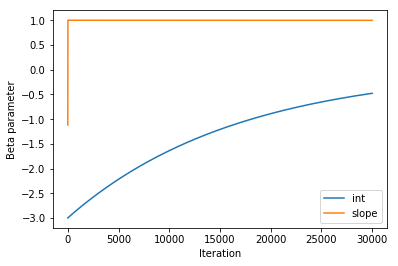

In [156]:
import matplotlib.pyplot as plt

plt.plot(np.array(rr_sgd.beta_history).squeeze().T[0])
plt.plot(np.array(rr_sgd.beta_history).squeeze().T[1])

plt.xlabel('Iteration')
plt.ylabel('Beta parameter')
plt.legend(['int','slope'])
plt.show()

In [141]:
np.array(rr_sgd.beta_history).squeeze().T[0]


array([-2.9999046 , -2.99981113, -2.99971954, ..., -2.82066798,
       -2.82066231, -2.82065664])